In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [33]:
addresses = pd.read_csv("addresses.csv")
users = pd.read_csv("user.csv")
credit_data = pd.read_csv("credit_data")
merchants = pd.read_csv("merchants")
cards = pd.read_csv("cards_data.csv")
transaction = pd.read_csv("transaction.csv")


# Data Cleaning

In [34]:
transaction['amount'] = transaction['amount'].replace('[\$,]', '', regex=True).astype(float)


In [18]:
transaction['date']= pd.to_datetime(transaction['date'])

In [92]:
# SQL Connection

In [112]:
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="@Yashi123**",
    database="fraud_detection"
)

cursor = conn.cursor()
cursor.execute("SELECT VERSION();")
version = cursor.fetchone()
print("Connected to MySQL version:", version[0])

cursor.close()
conn.close()

Connected to MySQL version: 8.0.35


In [113]:
conn = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="@Yashi123**",
    database="fraud_detection"
)

In [114]:
import mysql.connector

try:
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="@Yashi123**",  
        database="fraud_detection"      
    )
    
    if conn.is_connected():
        print("✅ Successfully connected to MySQL!")

    conn.close()

except mysql.connector.Error as e:
    print(f"❌ MySQL Connection Error: {e}")

✅ Successfully connected to MySQL!


# ETL

In [19]:
import pandas as pd
from sqlalchemy import create_engine

# ✅ MySQL Database Connection
MYSQL_USER = "root"
MYSQL_PASSWORD = "%40Yashi123**"  
MYSQL_HOST = "localhost"
MYSQL_PORT = "3306"
MYSQL_DATABASE = "fraud_detection"

# ✅ Create MySQL Connection
try:
    engine = create_engine(f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DATABASE}")
    print("✅ MySQL Connection Successful")
except Exception as e:
    print(f"❌ MySQL Connection Failed: {e}")

# ✅ Extract: Read data from CSV files
def extract_data(file_path):
    print(f"📥 Extracting data from: {file_path}")
    try:
        df = pd.read_csv(file_path, low_memory=False)  
        print(f"✅ Successfully read {file_path} with {df.shape[0]} rows and {df.shape[1]} columns.")
        return df
    except Exception as e:
        print(f"❌ Error reading {file_path}: {e}")
        return None

# ✅ Load: Store the cleaned data in MySQL database
def load_data_to_mysql(df, table_name):
    if df is None:
        print(f"⚠️ Skipping {table_name} due to extraction failure.")
        return
    
    print(f"📤 Loading data into MySQL table: {table_name}")
    try:
        df.to_sql(table_name, engine, if_exists='replace', index=False)
        print(f"✅ Data successfully loaded into {table_name}")
    except Exception as e:
        print(f"❌ Error loading {table_name}: {e}")

# ✅ File paths for each table
file_paths = {
    "transaction":  r"C:\Users\Dell\Downloads\transaction.csv",
    "user":  r"C:\Users\Dell\Downloads\user.csv",
    "credit_data":  r"C:\Users\Dell\Downloads\credit_data",
    "merchants":  r"C:\Users\Dell\Downloads\merchants",
    "addresses": r"C:\Users\Dell\Downloads\addresses.csv",
    "cards": r"C:\Users\Dell\Downloads\cards_data.csv"
}

# ✅ Running the ETL Pipeline (Without Transformation)
for table, file_path in file_paths.items():
    df_raw = extract_data(file_path)  
    load_data_to_mysql(df_raw, table)  #  Directly load into MySQL

print("🚀 ETL Pipeline Completed Successfully!")


✅ MySQL Connection Successful
📥 Extracting data from: C:\Users\Dell\Downloads\transactions.csv
✅ Successfully read C:\Users\Dell\Downloads\transactions.csv with 211393 rows and 16 columns.
📤 Loading data into MySQL table: transactions
✅ Data successfully loaded into transactions
📥 Extracting data from: C:\Users\Dell\Downloads\user.csv
✅ Successfully read C:\Users\Dell\Downloads\user.csv with 2000 rows and 13 columns.
📤 Loading data into MySQL table: user
✅ Data successfully loaded into user
📥 Extracting data from: C:\Users\Dell\Downloads\credit_data
✅ Successfully read C:\Users\Dell\Downloads\credit_data with 2000 rows and 5 columns.
📤 Loading data into MySQL table: credit_data
✅ Data successfully loaded into credit_data
📥 Extracting data from: C:\Users\Dell\Downloads\merchants
✅ Successfully read C:\Users\Dell\Downloads\merchants with 681 rows and 6 columns.
📤 Loading data into MySQL table: merchants
✅ Data successfully loaded into merchants
📥 Extracting data from: C:\Users\Dell\Downl

In [46]:
addresses = pd.read_csv("addresses.csv")
users = pd.read_csv("user.csv")
credit_data = pd.read_csv("credit_data")
merchants = pd.read_csv("merchants")
cards = pd.read_csv("cards_data.csv")
transaction = pd.read_csv("transaction.csv")


In [3]:
merchants

,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,89462,Terre Haute,IN,47805,5300,Insufficient Balance
1,9263,Fresno,CA,93727,5912,Insufficient Balance
2,40948,Westminster,CA,92683,5411,Insufficient Balance
3,88937,Canton,NC,28716,5813,Insufficient Balance
4,47588,Parrish,AL,35580,5812,Insufficient Balance
...,...,...,...,...,...,...
676,83989,Colfax,WI,54730,5310,"Insufficient Balance,Technical Glitch"
677,7682,Novato,CA,94947,1711,"Bad PIN,Technical Glitch"
678,14402,Arlington,TX,76012,4900,"Insufficient Balance,Technical Glitch"
679,5718,Joliet,IL,60432,7011,"Bad PIN,Technical Glitch"


In [8]:
transaction

,id,date,client_id,card_id,amount,use_chip,merchant_id,errors,year,fraud_classification,errors_indicator,FirstTransactionDate,UserType,IsFraud,use_chip_classification
0,7475516,2010-01-01 04:56:00,464,3233,$104.10,Swipe Transaction,32175,Technical Glitch,2010,Non-Fraud,0,2010-01-01 04:56:00,New,0,Non-Chip_Based
1,7475611,2010-01-01 06:10:00,1797,1127,$28.84,Online Transaction,15143,Bad Expiration,2010,Fraud,1,2010-01-01 06:10:00,New,1,Non-Chip_Based
2,7475643,2010-01-01 06:19:00,1797,1127,$38.58,Online Transaction,15143,Bad Card Number,2010,Fraud,1,2010-01-01 06:10:00,Repeat,1,Non-Chip_Based
3,7475792,2010-01-01 07:02:00,1424,4710,$-72.00,Swipe Transaction,59935,Insufficient Balance,2010,Non-Fraud,0,2010-01-01 07:02:00,New,0,Non-Chip_Based
4,7475881,2010-01-01 07:22:00,843,184,$37.54,Swipe Transaction,89462,Insufficient Balance,2010,Non-Fraud,0,2010-01-01 07:22:00,New,0,Non-Chip_Based
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211388,23761252,2019-10-31 19:13:00,1902,3056,$99.28,Chip Transaction,61677,Technical Glitch,2019,Non-Fraud,0,2010-01-13 18:56:00,Repeat,0,Chip_Based
211389,23761496,2019-10-31 20:48:00,1985,4085,$10.74,Chip Transaction,70635,Bad PIN,2019,Fraud,1,2010-01-03 17:24:00,Repeat,1,Chip_Based
211390,23761675,2019-10-31 21:57:00,87,3607,$20.00,Chip Transaction,27092,Insufficient Balance,2019,Non-Fraud,0,2010-01-12 08:28:00,Repeat,0,Chip_Based
211391,23761735,2019-10-31 22:23:00,1851,3164,$166.38,Online Transaction,32480,Insufficient Balance,2019,Non-Fraud,0,2010-02-06 07:03:00,Repeat,0,Non-Chip_Based


# Merging (CREATING RELATIONSHIP)

In [13]:
transaction['client_id'] = transaction['client_id'].astype(str).str.strip()
users['id'] = users['id'].astype(str).str.strip()

merged_df = transaction.merge(users, left_on='client_id', right_on='id', how='left')

print("Merge Successful! Rows:", merged_df.shape[0])


Merge Successful! Rows: 211393


In [14]:
merged_df = transaction.merge(users, left_on='client_id', right_on='id', how='left', suffixes=('_trans', '_user'))

print("✅ Merge Successful! Shape:", merged_df.shape)
print(merged_df.head())

✅ Merge Successful! Shape: (211393, 28)
   id_trans                 date client_id  card_id   amount  \
0   7475516  2010-01-01 04:56:00       464     3233  $104.10   
1   7475611  2010-01-01 06:10:00      1797     1127   $28.84   
2   7475643  2010-01-01 06:19:00      1797     1127   $38.58   
3   7475792  2010-01-01 07:02:00      1424     4710  $-72.00   
4   7475881  2010-01-01 07:22:00       843      184   $37.54   

             use_chip  merchant_id                errors  year  \
0   Swipe Transaction        32175      Technical Glitch  2010   
1  Online Transaction        15143        Bad Expiration  2010   
2  Online Transaction        15143       Bad Card Number  2010   
3   Swipe Transaction        59935  Insufficient Balance  2010   
4   Swipe Transaction        89462  Insufficient Balance  2010   

  fraud_classification  ...  birth_year birth_month  gender  \
0            Non-Fraud  ...        1983          11    Male   
1                Fraud  ...        1952          11 

In [15]:
# Merge with cards (card_id → id in cards table)
merged_df = merged_df.merge(cards, left_on='card_id', right_on='id', how='left', suffixes=('_merged', '_cards'))

print("✅ Merge with Cards Successful! Shape:", merged_df.shape)
print(merged_df.head())

✅ Merge with Cards Successful! Shape: (211393, 41)
   id_trans                 date client_id_merged  card_id   amount  \
0   7475516  2010-01-01 04:56:00              464     3233  $104.10   
1   7475611  2010-01-01 06:10:00             1797     1127   $28.84   
2   7475643  2010-01-01 06:19:00             1797     1127   $38.58   
3   7475792  2010-01-01 07:02:00             1424     4710  $-72.00   
4   7475881  2010-01-01 07:22:00              843      184   $37.54   

             use_chip  merchant_id                errors  year  \
0   Swipe Transaction        32175      Technical Glitch  2010   
1  Online Transaction        15143        Bad Expiration  2010   
2  Online Transaction        15143       Bad Card Number  2010   
3   Swipe Transaction        59935  Insufficient Balance  2010   
4   Swipe Transaction        89462  Insufficient Balance  2010   

  fraud_classification  ...  card_type       card_number  expires  cvv  \
0            Non-Fraud  ...     Credit   3523973603

In [16]:
merged_df['card_id'] = merged_df['card_id'].astype(str).str.strip()
credit_data['id'] = credit_data['id'].astype(str).str.strip()

# Merge with credit data (card_id → id in credit_data table)
merged_df = merged_df.merge(credit_data, left_on='card_id', right_on='id', how='left', suffixes=('_merged', '_credit'))

print("✅ Merge with Credit Data Successful! Shape:", merged_df.shape)
print(merged_df.head())

✅ Merge with Credit Data Successful! Shape: (211393, 46)
   id_trans                 date client_id_merged card_id   amount  \
0   7475516  2010-01-01 04:56:00              464    3233  $104.10   
1   7475611  2010-01-01 06:10:00             1797    1127   $28.84   
2   7475643  2010-01-01 06:19:00             1797    1127   $38.58   
3   7475792  2010-01-01 07:02:00             1424    4710  $-72.00   
4   7475881  2010-01-01 07:22:00              843     184   $37.54   

             use_chip  merchant_id                errors  year  \
0   Swipe Transaction        32175      Technical Glitch  2010   
1  Online Transaction        15143        Bad Expiration  2010   
2  Online Transaction        15143       Bad Card Number  2010   
3   Swipe Transaction        59935  Insufficient Balance  2010   
4   Swipe Transaction        89462  Insufficient Balance  2010   

  fraud_classification  ...  num_cards_issued credit_limit acct_open_date  \
0            Non-Fraud  ...                 2   

In [17]:
print("Columns in merged_df:", merged_df.columns)


Columns in merged_df: Index(['id_trans', 'date', 'client_id_merged', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'errors', 'year', 'fraud_classification',
       'errors_indicator', 'FirstTransactionDate', 'UserType', 'IsFraud',
       'use_chip_classification', 'id_user', 'current_age', 'retirement_age',
       'birth_year', 'birth_month', 'gender', 'per_capita_income_merged',
       'yearly_income_merged', 'total_debt_merged', 'credit_score_merged',
       'num_credit_cards', 'creditscoreCategory', 'AgeGroup', 'id_merged',
       'client_id_cards', 'card_brand', 'card_type', 'card_number', 'expires',
       'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web', 'id_credit',
       'per_capita_income_credit', 'yearly_income_credit', 'total_debt_credit',
       'credit_score_credit'],
      dtype='object')


In [18]:
merged_df['client_id_merged'] = merged_df['client_id_merged'].astype(str).str.strip()
addresses['id'] = addresses['id'].astype(str).str.strip()


In [19]:
# Merge with addresses (client_id_merged → id in addresses table)
merged_df = merged_df.merge(addresses, left_on='client_id_merged', right_on='id', how='left', suffixes=('_merged', '_address'))

print("✅ Merge with Addresses Successful! Shape:", merged_df.shape)
print(merged_df.head())

✅ Merge with Addresses Successful! Shape: (211393, 50)
   id_trans                 date client_id_merged card_id   amount  \
0   7475516  2010-01-01 04:56:00              464    3233  $104.10   
1   7475611  2010-01-01 06:10:00             1797    1127   $28.84   
2   7475643  2010-01-01 06:19:00             1797    1127   $38.58   
3   7475792  2010-01-01 07:02:00             1424    4710  $-72.00   
4   7475881  2010-01-01 07:22:00              843     184   $37.54   

             use_chip  merchant_id                errors  year  \
0   Swipe Transaction        32175      Technical Glitch  2010   
1  Online Transaction        15143        Bad Expiration  2010   
2  Online Transaction        15143       Bad Card Number  2010   
3   Swipe Transaction        59935  Insufficient Balance  2010   
4   Swipe Transaction        89462  Insufficient Balance  2010   

  fraud_classification  ...  card_on_dark_web id_credit  \
0            Non-Fraud  ...                No       NaN   
1        

In [41]:
transaction

,id,date,client_id,card_id,amount,use_chip,merchant_id,errors,year,fraud_classification,errors_indicator,FirstTransactionDate,UserType,IsFraud,use_chip_classification
0,7475516,2010-01-01 04:56:00,464,3233,$104.10,Swipe Transaction,32175,Technical Glitch,2010,Non-Fraud,0,2010-01-01 04:56:00,New,0,Non-Chip_Based
1,7475611,2010-01-01 06:10:00,1797,1127,$28.84,Online Transaction,15143,Bad Expiration,2010,Fraud,1,2010-01-01 06:10:00,New,1,Non-Chip_Based
2,7475643,2010-01-01 06:19:00,1797,1127,$38.58,Online Transaction,15143,Bad Card Number,2010,Fraud,1,2010-01-01 06:10:00,Repeat,1,Non-Chip_Based
3,7475792,2010-01-01 07:02:00,1424,4710,$-72.00,Swipe Transaction,59935,Insufficient Balance,2010,Non-Fraud,0,2010-01-01 07:02:00,New,0,Non-Chip_Based
4,7475881,2010-01-01 07:22:00,843,184,$37.54,Swipe Transaction,89462,Insufficient Balance,2010,Non-Fraud,0,2010-01-01 07:22:00,New,0,Non-Chip_Based
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211388,23761252,2019-10-31 19:13:00,1902,3056,$99.28,Chip Transaction,61677,Technical Glitch,2019,Non-Fraud,0,2010-01-13 18:56:00,Repeat,0,Chip_Based
211389,23761496,2019-10-31 20:48:00,1985,4085,$10.74,Chip Transaction,70635,Bad PIN,2019,Fraud,1,2010-01-03 17:24:00,Repeat,1,Chip_Based
211390,23761675,2019-10-31 21:57:00,87,3607,$20.00,Chip Transaction,27092,Insufficient Balance,2019,Non-Fraud,0,2010-01-12 08:28:00,Repeat,0,Chip_Based
211391,23761735,2019-10-31 22:23:00,1851,3164,$166.38,Online Transaction,32480,Insufficient Balance,2019,Non-Fraud,0,2010-02-06 07:03:00,Repeat,0,Non-Chip_Based


# EDA -

# FRAUD TRANSACTIONS GENDER-WISE

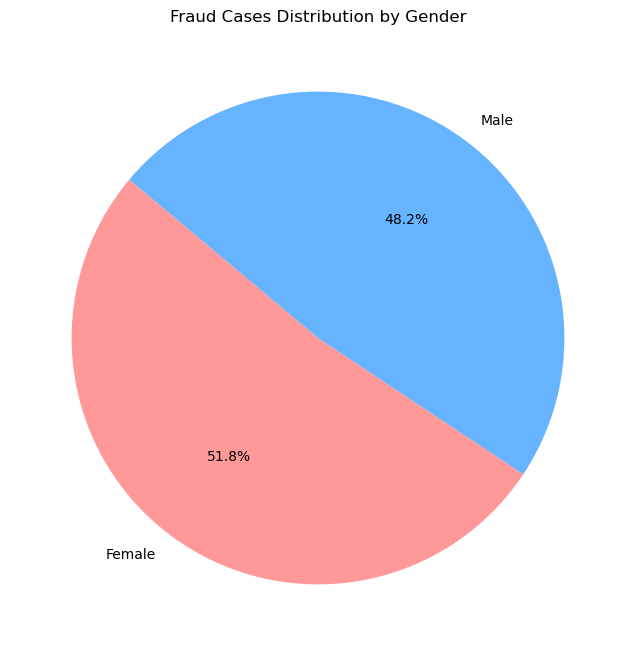

In [20]:
# Fraud cases by gender
fraud_by_gender = merged_df[merged_df['fraud_classification'] == 'Fraud'].groupby('gender').size()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(fraud_by_gender, labels=fraud_by_gender.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'], startangle=140)

# Title
plt.title('Fraud Cases Distribution by Gender')
plt.show()


# FRAUD VS NON FRAUD TRANSACTIONS

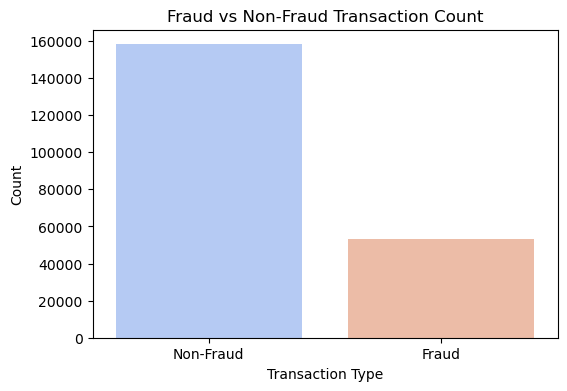

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(data=transaction, x='fraud_classification', palette='coolwarm')
plt.title('Fraud vs Non-Fraud Transaction Count')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


# FRAUD CASES BY CARD BRAND

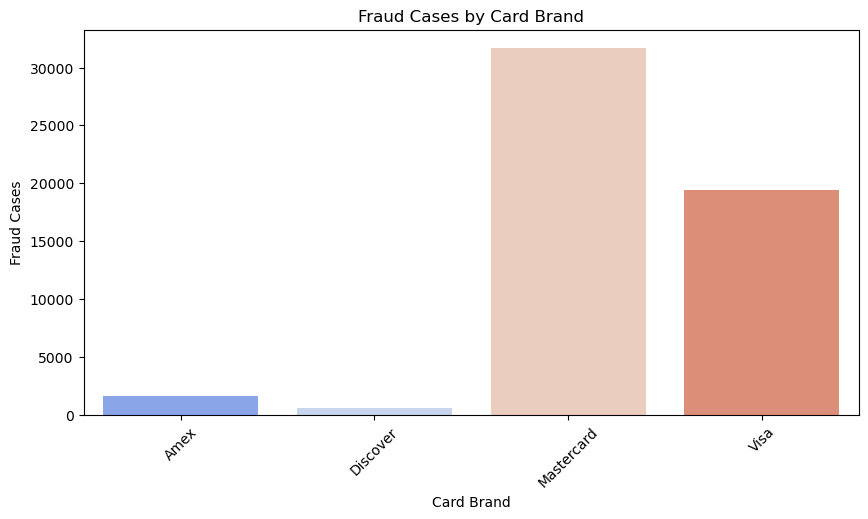

In [29]:
fraud_by_card_brand = merged_df[merged_df['fraud_classification'] == 'Fraud'].groupby('card_brand').size()

plt.figure(figsize=(10, 5))
sns.barplot(x=fraud_by_card_brand.index, y=fraud_by_card_brand.values, palette='coolwarm')
plt.xlabel("Card Brand")
plt.ylabel("Fraud Cases")
plt.title("Fraud Cases by Card Brand")
plt.xticks(rotation=45)
plt.show()

# FRAUD CASES BY CREDIT TYPE

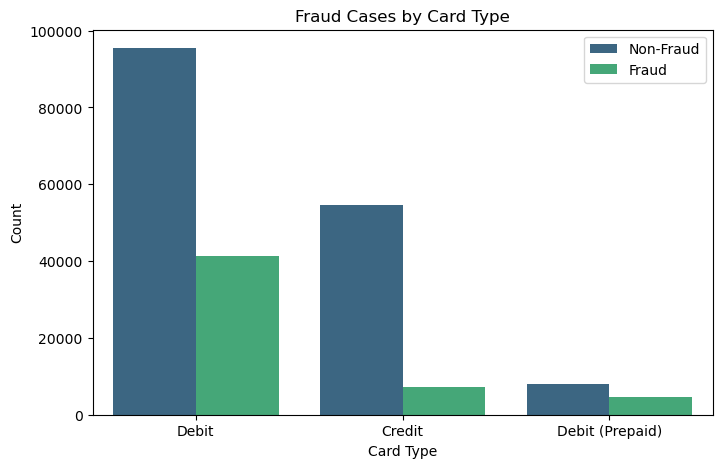

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='card_type', hue='fraud_classification', palette='viridis', order=merged_df['card_type'].value_counts().index)
plt.xlabel("Card Type")
plt.ylabel("Count")
plt.title("Fraud Cases by Card Type")
plt.legend(["Non-Fraud", "Fraud"])
plt.show()


# Fraud Transactions per Merchant Category

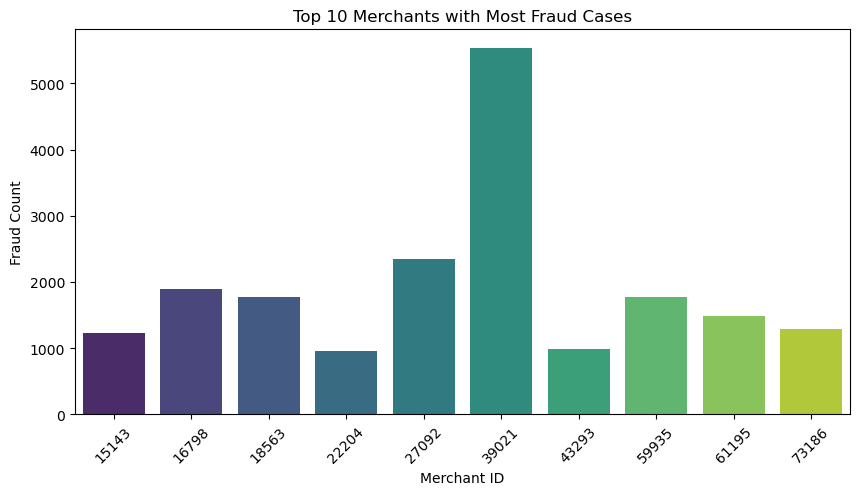

In [22]:
plt.figure(figsize=(10,5))
fraud_by_mcc = transaction[transaction['fraud_classification']=='Fraud'].groupby('merchant_id').size().nlargest(10)
sns.barplot(x=fraud_by_mcc.index, y=fraud_by_mcc.values, palette='viridis')
plt.title('Top 10 Merchants with Most Fraud Cases')
plt.xlabel('Merchant ID')
plt.ylabel('Fraud Count')
plt.xticks(rotation=45)
plt.show()

# FRAUD BY PAYMENT METHOD

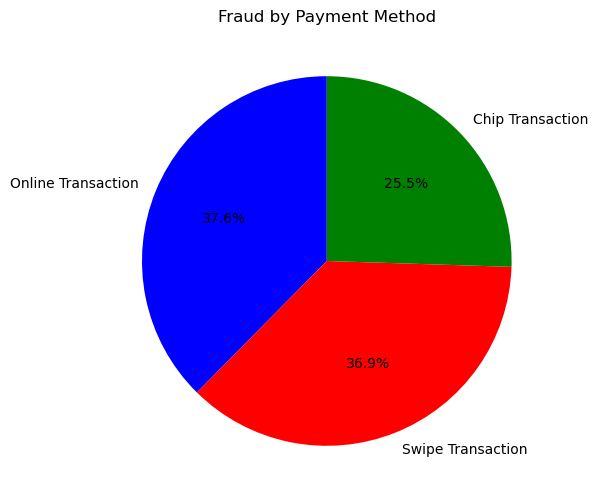

In [26]:
plt.figure(figsize=(6,6))
fraud_payment = transaction[transaction['fraud_classification']=='Fraud']['use_chip'].value_counts()
plt.pie(fraud_payment, labels=fraud_payment.index, autopct='%1.1f%%', colors=['blue', 'red', 'green'], startangle=90)
plt.title('Fraud by Payment Method')
plt.show()


# AVERAGE TRANSACTION AMOUNT BY AGE GROUP

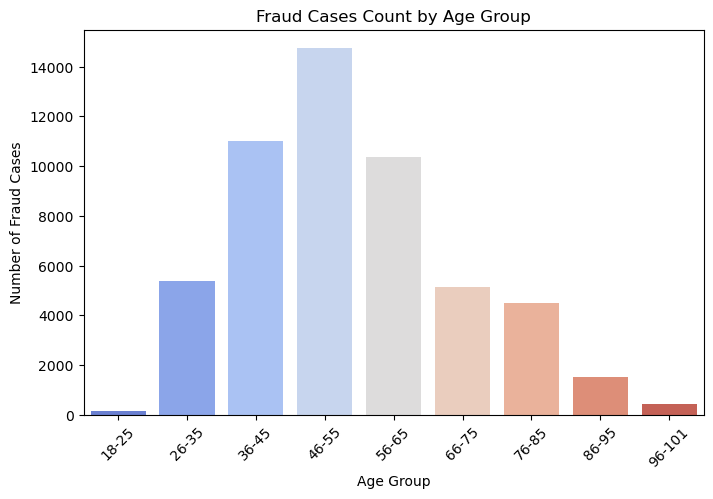

In [19]:
plt.figure(figsize=(8,5))

# Fraud cases count by Age Group
fraud_cases = merged_df[merged_df['fraud_classification'] == 'Fraud'].groupby('AgeGroup').size()

sns.barplot(x=fraud_cases.index, y=fraud_cases.values, palette='coolwarm')

plt.title('Fraud Cases Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)

plt.show()


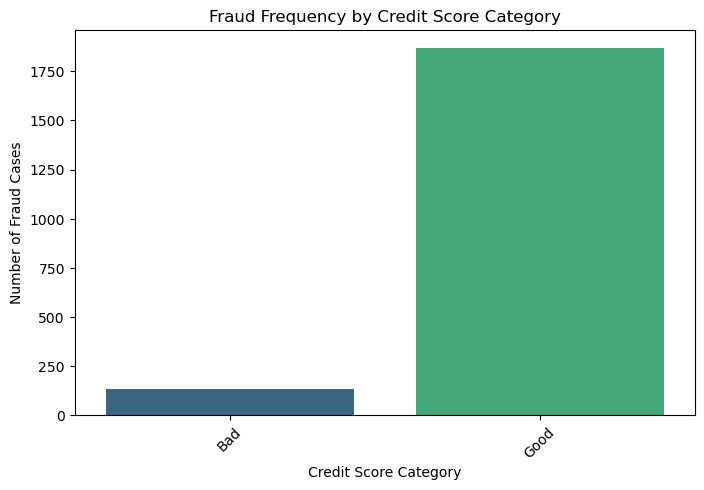

In [20]:
plt.figure(figsize=(8,5))
credit_fraud = users.groupby('creditscoreCategory')['id'].count()
sns.barplot(x=credit_fraud.index, y=credit_fraud.values, palette='viridis')
plt.title('Fraud Frequency by Credit Score Category')
plt.xlabel('Credit Score Category')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)
plt.show()


# FRAUD TRANSACTION ON HOURLY BASIS

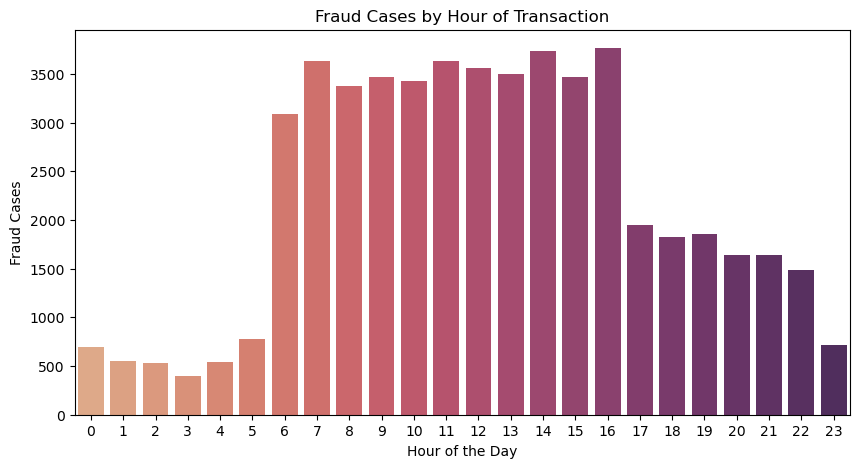

In [23]:
merged_df['hour'] = pd.to_datetime(merged_df['date']).dt.hour  # Extract hour

plt.figure(figsize=(10, 5))
sns.countplot(data=merged_df[merged_df['fraud_classification'] == 'Fraud'], x='hour', palette='flare')
plt.xlabel("Hour of the Day")
plt.ylabel("Fraud Cases")
plt.title("Fraud Cases by Hour of Transaction")
plt.show()


# TRANSACTION FREQUENCY PER USER

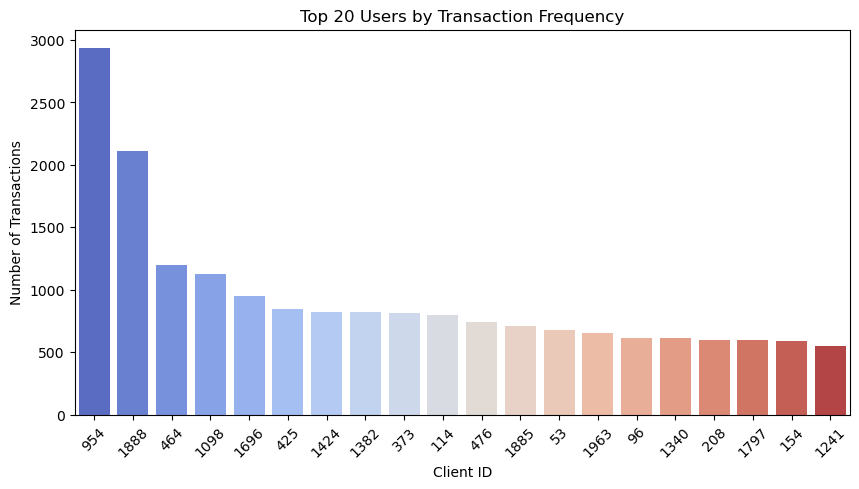

In [21]:
plt.figure(figsize=(10,5))
user_transaction = transaction.groupby('client_id').size().nlargest(20)
sns.barplot(x=user_transaction.index, y=user_transaction.values, palette='coolwarm')
plt.title('Top 20 Users by Transaction Frequency')
plt.xlabel('Client ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

In [154]:
#High-Risk Merchants Based on Total Fraud Amount

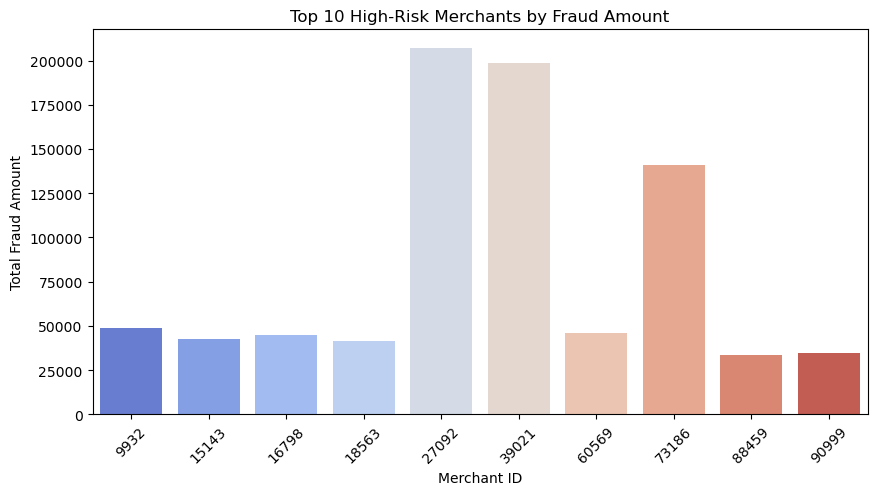

In [36]:
plt.figure(figsize=(10,5))
high_risk_merchants = transaction[transaction['fraud_classification']=='Fraud'].groupby('merchant_id')['amount'].sum().nlargest(10)
sns.barplot(x=high_risk_merchants.index, y=high_risk_merchants.values, palette='coolwarm')
plt.title('Top 10 High-Risk Merchants by Fraud Amount')
plt.xlabel('Merchant ID')
plt.ylabel('Total Fraud Amount')
plt.xticks(rotation=45)
plt.show()


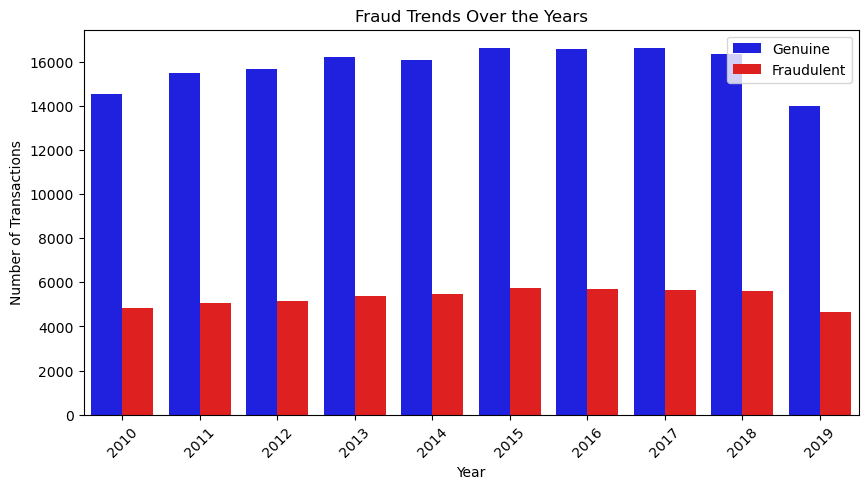

In [31]:
# Fraud trends over time
plt.figure(figsize=(10, 5))
sns.countplot(data=merged_df, x='year', hue='IsFraud', palette=['blue', 'red'])
plt.title("Fraud Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Transactions")
plt.legend(["Genuine", "Fraudulent"])
plt.xticks(rotation=45)
plt.show()


# Statistical Analysis (before adding new transaction)

In [55]:
print(transaction[['amount']].info())  
print(transaction['amount'].head())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211393 entries, 0 to 211392
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   amount  211393 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB
None
0    $104.10
1     $28.84
2     $38.58
3    $-72.00
4     $37.54
Name: amount, dtype: object


In [26]:
merged_df['amount1']

0         104.10
1          28.84
2          38.58
3         -72.00
4          37.54
           ...  
211388     99.28
211389     10.74
211390     20.00
211391    166.38
211392     61.67
Name: amount1, Length: 211393, dtype: float64

In [25]:
print(transaction[['amount']].info())  
print(transaction['amount'].head()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211393 entries, 0 to 211392
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   amount  211393 non-null  float64
dtypes: float64(1)
memory usage: 1.6 MB
None
0    104.10
1     28.84
2     38.58
3    -72.00
4     37.54
Name: amount, dtype: float64


In [35]:
# Fraud vs Non-Fraud Amount Comparison
fraud_amounts = transaction[transaction['fraud_classification'] == 'Fraud']['amount']
non_fraud_amounts = transaction[transaction['fraud_classification'] == 'Non-Fraud']['amount']

# T-Test (Check if Fraud transactions have significantly higher amount)
t_stat, p_value = stats.ttest_ind(fraud_amounts, non_fraud_amounts, equal_var=False)

print("🔹 T-Test Results for Fraud vs Non-Fraud Transactions:")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)


🔹 T-Test Results for Fraud vs Non-Fraud Transactions:
T-Statistic: -46.80206066714595
P-Value: 0.0


In [33]:
print("Mean Fraud Amount:", fraud_amounts.mean())
print("Mean Non-Fraud Amount:", non_fraud_amounts.mean())


Mean Fraud Amount: 47.259997184631835
Mean Non-Fraud Amount: 64.27218437330028


In [46]:
print("Mean Fraud Amount:", fraud_amounts.mean())
print("Mean Non-Fraud Amount:", non_fraud_amounts.mean())


Mean Fraud Amount: 49.15100206456456
Mean Non-Fraud Amount: 64.27218437330028


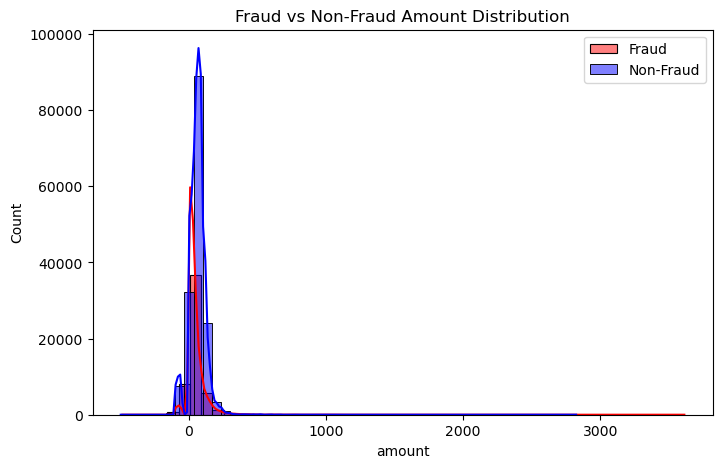

In [63]:
plt.figure(figsize=(8,5))
sns.histplot(fraud_amounts, bins=50, color='red', label="Fraud", kde=True)
sns.histplot(non_fraud_amounts, bins=50, color='blue', label="Non-Fraud", kde=True)
plt.legend()
plt.title('Fraud vs Non-Fraud Amount Distribution')
plt.show()


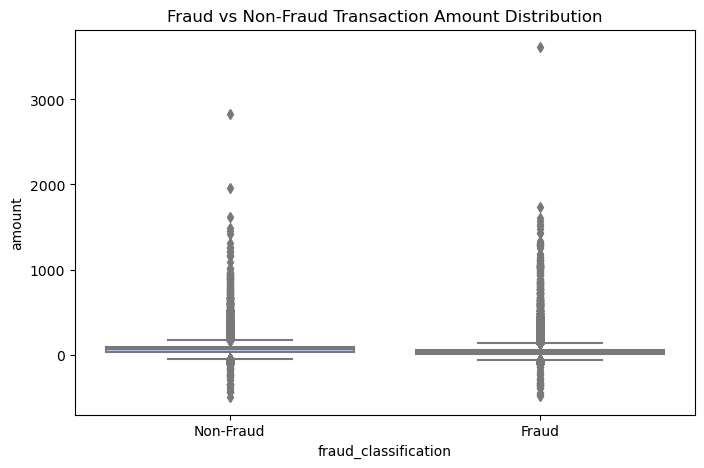

In [66]:
plt.figure(figsize=(8,5))
sns.boxplot(x=transaction['fraud_classification'], y=transaction['amount'], palette="coolwarm")
plt.title('Fraud vs Non-Fraud Transaction Amount Distribution')
plt.show()


In [67]:
fraud_amounts.describe()


count    53279.000000
mean        47.259997
std         76.232668
min       -485.000000
25%         12.270000
50%         31.130000
75%         60.580000
max       3613.220000
Name: amount, dtype: float64

In [93]:
# Fraud Rate

In [36]:
fraud_rate = len(fraud_amounts) / len(transaction) * 100
print(f"🔹 Fraud Rate: {fraud_rate:.2f}%")



🔹 Fraud Rate: 25.20%


In [70]:
# Top 10 Fraud Clients
top_fraud_clients = transaction[transaction['fraud_classification'] == 'Fraud'].groupby('client_id')['amount'].sum().nlargest(10)
print("🔹 Top 10 Fraud Clients by Amount:")
print(top_fraud_clients)

# Top 10 Fraud Merchants
top_fraud_merchants = transaction[transactions['fraud_classification'] == 'Fraud'].groupby('merchant_id')['amount'].sum().nlargest(10)
print("🔹 Top 10 Fraud Merchants by Amount:")
print(top_fraud_merchants)


🔹 Top 10 Fraud Clients by Amount:
client_id
1797    14496.29
1168    11870.76
1259    10514.79
1169    10368.30
1558    10309.33
327      8620.85
1534     8577.22
1575     8322.10
1776     8242.53
135      8057.51
Name: amount, dtype: float64
🔹 Top 10 Fraud Merchants by Amount:
merchant_id
27092    207211.18
39021    198866.45
73186    141163.29
9932      48960.00
60569     45922.35
16798     44753.97
15143     42898.78
18563     41427.58
90999     34596.51
88459     33344.80
Name: amount, dtype: float64


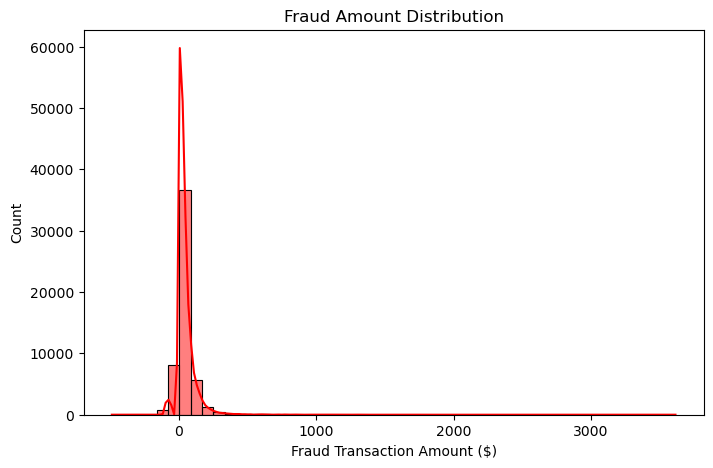

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(fraud_amounts, bins=50, color='red', kde=True)
plt.title('Fraud Amount Distribution')
plt.xlabel('Fraud Transaction Amount ($)')
plt.ylabel('Count')
plt.show()


In [76]:
high_risk_fraud = fraud_amounts[(fraud_amounts > 10) & (fraud_amounts < 100)]
print(f"🔹 Fraud in $10-$100 range: {len(high_risk_fraud)} transactions")


🔹 Fraud in $10-$100 range: 35287 transactions


# Anomaly Detection (without adding new transaction)

In [84]:
#  Outlier Detection using Z-Score

In [82]:
# Compute Z-Score for Fraud Transactions
transaction['z_score'] = np.abs(stats.zscore(transaction['amount']))

# Define threshold (typically Z > 3 is considered an outlier)
outliers = transaction[transaction['z_score'] > 3]

print(f"🔹 Total Anomalous Transactions: {len(outliers)}")
print(outliers[['client_id', 'amount', 'fraud_classification']].head(10))


🔹 Total Anomalous Transactions: 1711
      client_id  amount fraud_classification
248         150  270.06                Fraud
432        1223  338.98                Fraud
474         738  346.57                Fraud
636        1168  410.14            Non-Fraud
826        1168  531.24            Non-Fraud
835        1086  294.49                Fraud
1152        708  575.82                Fraud
1719        839  419.65                Fraud
1799       1223  356.88                Fraud
2042       1788  441.41                Fraud


# Fraud Anomalies

In [83]:
fraud_outliers = outliers[outliers['fraud_classification'] == 'Fraud']
print(f"🔹 Total Fraud Anomalous Transactions: {len(fraud_outliers)}")
print(fraud_outliers[['client_id', 'amount']].head(10))


🔹 Total Fraud Anomalous Transactions: 814
      client_id  amount
248         150  270.06
432        1223  338.98
474         738  346.57
835        1086  294.49
1152        708  575.82
1719        839  419.65
1799       1223  356.88
2042       1788  441.41
2395        526  277.00
2522       1967  306.32


In [85]:
# Outlier Detection using IQR (Interquartile Range)

In [86]:
Q1 = transaction['amount'].quantile(0.25)
Q3 = transaction['amount'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find Anomalous Transactions
anomalies_iqr = transaction[(transaction['amount'] < lower_bound) | (transaction['amount'] > upper_bound)]

print(f"🔹 Total Anomalous Transactions (IQR Method): {len(anomalies_iqr)}")
print(anomalies_iqr[['client_id', 'amount', 'fraud_classification']].head(10))


🔹 Total Anomalous Transactions (IQR Method): 10832
     client_id  amount fraud_classification
3         1424  -72.00            Non-Fraud
23         476  -83.00            Non-Fraud
60          96  187.72            Non-Fraud
71        1692  -78.00            Non-Fraud
97        1052  243.72                Fraud
101        205  -71.00            Non-Fraud
126       1921  -88.00            Non-Fraud
130        373  -89.00            Non-Fraud
159        497  -82.00            Non-Fraud
208       1872  187.29                Fraud


In [87]:
# Only fraud anomalies(IQR method)

In [88]:
fraud_outliers_iqr = anomalies_iqr[anomalies_iqr['fraud_classification'] == 'Fraud']
print(f"🔹 Total Fraud Anomalous Transactions (IQR Method): {len(fraud_outliers_iqr)}")
print(fraud_outliers_iqr[['client_id', 'amount']].head(10))


🔹 Total Fraud Anomalous Transactions (IQR Method): 2733
     client_id  amount
97        1052  243.72
208       1872  187.29
235        203  198.85
248        150  270.06
297       1498  -72.00
418        114  -91.00
432       1223  338.98
442       1031  200.00
474        738  346.57
548       1877  -80.00


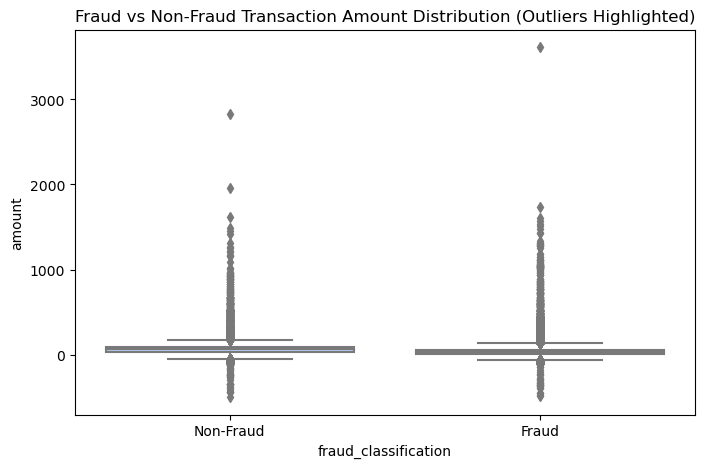

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x=transaction['fraud_classification'], y=transaction['amount'], palette="coolwarm")
plt.title('Fraud vs Non-Fraud Transaction Amount Distribution (Outliers Highlighted)')
plt.show()
